In [289]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [290]:
torch.__version__

'2.1.0+cu121'

In [291]:
weight = 0.7
bias = 0.3
x = torch.arange(0,1,0.02)
y = bias + weight*x

In [292]:
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [293]:
x.shape

torch.Size([50])

In [294]:
y.shape

torch.Size([50])

In [295]:
x[:10]

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])

In [296]:
y[:10]

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])

In [297]:
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test=y[40:]

In [298]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

(torch.Size([40]), torch.Size([40]), torch.Size([10]), torch.Size([10]))

In [299]:
def plot_predictions(a = x_train , b = y_train , c1 = x_test , d = y_test , prediction =None):
  plt.scatter(a,b,c='b')
  plt.scatter(c1,d,c='g')

  if prediction != None:
    plt.scatter(c1 , prediction , c='r')

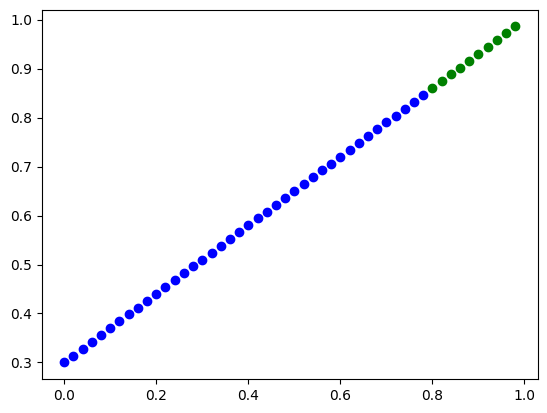

In [300]:
plot_predictions()

In [301]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(42)
    self.weights = nn.Parameter(torch.randn(1,dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1,dtype = torch.float), requires_grad = True)

  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.bias + self.weights * x

model0 = LinearRegressionModel()

In [302]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [303]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [304]:
with torch.inference_mode():
  y_pred = model0(x_test)

y_pred

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [305]:
x_test.shape , y_pred.shape

(torch.Size([10]), torch.Size([10]))

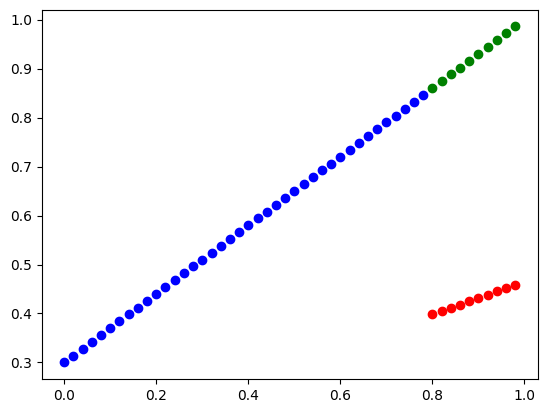

In [306]:
plot_predictions(prediction=y_pred)

In [307]:
lossfn = nn.L1Loss() #absolute loss
optimiser = torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [308]:
epoch = 200

for i in range(epoch):
    model0.train()

    y_pred = model0(x_train)

    loss = lossfn(y_pred, y_train)

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()


    model0.eval()

    with torch.inference_mode():
      test_pred = model0(x_test)

      testloss = lossfn(test_pred, y_test)

      if epoch % 10 == 0:
            print(f"Epoch: {i} | MAE Train Loss: {loss} | MAE Test Loss: {testloss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 1 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 2 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.4541231691837311 
Epoch: 3 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.44065219163894653 
Epoch: 4 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.4271811842918396 
Epoch: 5 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.41371020674705505 
Epoch: 6 | MAE Train Loss: 0.24375534057617188 | MAE Test Loss: 0.40023916959762573 
Epoch: 7 | MAE Train Loss: 0.23223432898521423 | MAE Test Loss: 0.3867681920528412 
Epoch: 8 | MAE Train Loss: 0.22071333229541779 | MAE Test Loss: 0.37329721450805664 
Epoch: 9 | MAE Train Loss: 0.20919232070446014 | MAE Test Loss: 0.3598262071609497 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 11 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842

In [309]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [310]:
test_pred , y_test

(tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
         0.9944]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

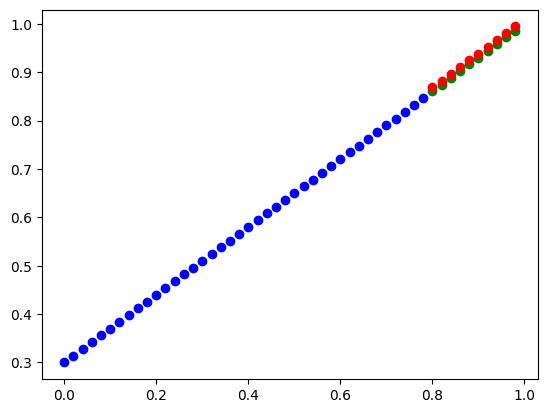

In [311]:
plot_predictions(prediction=test_pred)

In [312]:
#another model

In [313]:
weight = 0.3
bias = 0.9

x = torch.arange(0,100)
y = bias + weight*x

In [314]:
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [315]:
y

tensor([ 0.9000,  1.2000,  1.5000,  1.8000,  2.1000,  2.4000,  2.7000,  3.0000,
         3.3000,  3.6000,  3.9000,  4.2000,  4.5000,  4.8000,  5.1000,  5.4000,
         5.7000,  6.0000,  6.3000,  6.6000,  6.9000,  7.2000,  7.5000,  7.8000,
         8.1000,  8.4000,  8.7000,  9.0000,  9.3000,  9.6000,  9.9000, 10.2000,
        10.5000, 10.8000, 11.1000, 11.4000, 11.7000, 12.0000, 12.3000, 12.6000,
        12.9000, 13.2000, 13.5000, 13.8000, 14.1000, 14.4000, 14.7000, 15.0000,
        15.3000, 15.6000, 15.9000, 16.2000, 16.5000, 16.8000, 17.1000, 17.4000,
        17.7000, 18.0000, 18.3000, 18.6000, 18.9000, 19.2000, 19.5000, 19.8000,
        20.1000, 20.4000, 20.7000, 21.0000, 21.3000, 21.6000, 21.9000, 22.2000,
        22.5000, 22.8000, 23.1000, 23.4000, 23.7000, 24.0000, 24.3000, 24.6000,
        24.9000, 25.2000, 25.5000, 25.8000, 26.1000, 26.4000, 26.7000, 27.0000,
        27.3000, 27.6000, 27.9000, 28.2000, 28.5000, 28.8000, 29.1000, 29.4000,
        29.7000, 30.0000, 30.3000, 30.60

In [316]:
x.shape , y.shape

(torch.Size([100]), torch.Size([100]))

In [317]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [318]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

(torch.Size([80]), torch.Size([80]), torch.Size([20]), torch.Size([20]))

In [319]:
def plot_predictions1(a = x_train , b = y_train , c1 = x_test , d = y_test , prediction1 =None):
  plt.scatter(a,b,c='b')
  plt.scatter(c1,d,c='g')

  if prediction1 != None:
    plt.scatter(c1 , prediction1 , c='r')

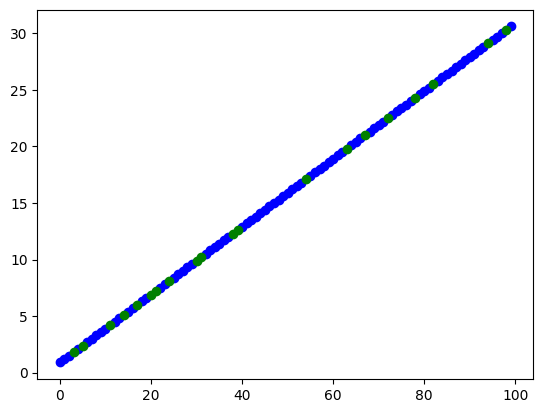

In [320]:
plot_predictions1()

In [321]:
class LinearRegressionModel1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(42)
    self.weights = nn.Parameter(torch.randn(1,dtype=float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=float),requires_grad =True)

  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.bias + self.weights * x

model1 = LinearRegressionModel1()

In [322]:
model1.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [323]:
with torch.inference_mode():
  y_pred = model1(x_test)

y_pred

tensor([ 5.8525,  3.8324,  1.1389,  7.1993,  1.8123,  4.8425, 24.3705,  8.2094,
         6.8626, 12.9230, 21.3403, 26.3907, 27.7374, 22.6871, 18.3101, 31.7777,
        10.5662, 33.1245, 10.2295, 13.2597], dtype=torch.float64)

In [324]:
lossfn = nn.L1Loss() #absolute loss
optimiser = torch.optim.SGD(params=model1.parameters(),lr=0.0001)

In [325]:
epoch = 300

for i in range(epoch):
  model1.train()

  y_pred = model1(x_train)

  loss = lossfn(y_pred , y_train)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model1.eval()

  with torch.inference_mode():
    test_pred = model1(x_test)

    test_loss = lossfn(test_pred , y_test)

    if i % 20 == 0:
      print(f"Epoch : {i} | Train Loss : {loss} | Test Loss : {test_loss}")

Epoch : 0 | Train Loss : 1.2649250911036234 | Test Loss : 0.8531125122813329
Epoch : 20 | Train Loss : 0.30740580924457267 | Test Loss : 0.3783535451133551
Epoch : 40 | Train Loss : 0.30708659049457254 | Test Loss : 0.37795317011335533
Epoch : 60 | Train Loss : 0.3067673717445728 | Test Loss : 0.37755279511335516
Epoch : 80 | Train Loss : 0.3064481529945726 | Test Loss : 0.3771524201133546
Epoch : 100 | Train Loss : 0.3061289342445729 | Test Loss : 0.37675204511335464
Epoch : 120 | Train Loss : 0.30580971549457264 | Test Loss : 0.3763516701133543
Epoch : 140 | Train Loss : 0.30549049674457207 | Test Loss : 0.3759512951133545
Epoch : 160 | Train Loss : 0.3051712779945724 | Test Loss : 0.37555092011335456
Epoch : 180 | Train Loss : 0.30485205924457226 | Test Loss : 0.375150545113354
Epoch : 200 | Train Loss : 0.30453284049457235 | Test Loss : 0.37475017011335354
Epoch : 220 | Train Loss : 0.3042136217445722 | Test Loss : 0.37434979511335353
Epoch : 240 | Train Loss : 0.3039263079082925 |

In [326]:
model1.state_dict()

OrderedDict([('weights', tensor([0.3107], dtype=torch.float64)),
             ('bias', tensor([0.1403], dtype=torch.float64))])

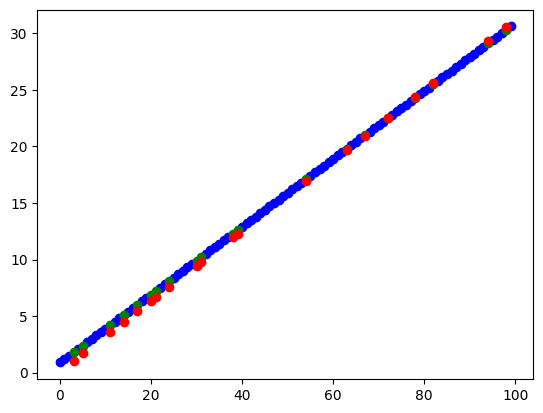

In [327]:
plot_predictions1(prediction1 = test_pred)